In [54]:
%pylab inline
import biff
from scipy import special
import pygadgetreader
import reading_snapshots

Populating the interactive namespace from numpy and matplotlib


In [55]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)


In [56]:
r_s_sims = 40.85

In [140]:
# data
coeff_c = np.loadtxt('../../SCF_tools/PCA/MWLMC5_coeff_20_20_100M_b1.txt')
S = coeff_c[:,0]
T = coeff_c[:,1]

S_matrix = np.zeros((21, 21, 21))
T_matrix = np.zeros((21, 21, 21))


counter = 0
for n in range(21):
    for l in range(21):
        for m in range(0, l+1):
            S_matrix[n][l][m] = S[counter]
            T_matrix[n][l][m] = T[counter]
            counter +=1

In [58]:
def Anl(n, l):
    knl = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)
    A_nl = - 2**(8*l+6)/(4*np.pi*knl) * (special.factorial(n)*(n+2*l+3/2.)*(special.gamma(2*l+3/2.))**2)/(special.gamma(n+4*l+3))
    return A_nl

In [59]:
A_nl_array = np.zeros((21, 21))
for j in range(21):
    for i in range(21):
        A_nl_array[j][i] = Anl(j, i)

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


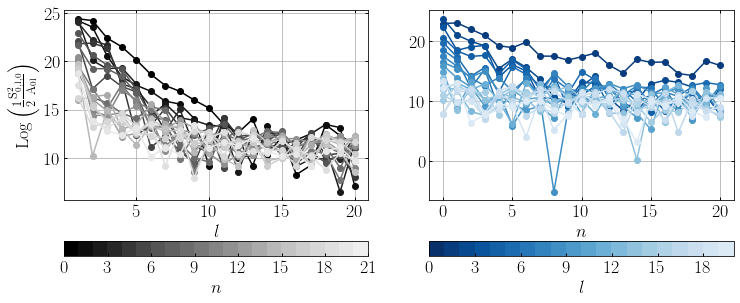

In [71]:
figure(figsize=(12, 5))

c1 = np.arange(0., 20 + 1)
cmap1 = plt.get_cmap("Greys_r", len(c1)+3)
norm1 = matplotlib.colors.BoundaryNorm(np.arange(len(c1)+1),len(c1))
sm1 = plt.cm.ScalarMappable(norm=norm1, cmap=cmap1)
sm1.set_array([])

c2 = np.arange(1., 20 + 1)
cmap2 = plt.get_cmap("Blues_r", len(c2)+3)
norm2 = matplotlib.colors.BoundaryNorm(np.arange(len(c2)+1),len(c2))
sm2 = plt.cm.ScalarMappable(norm=norm2, cmap=cmap2)
sm2.set_array([])

subplot(1, 2, 1)

for i in range(20):
    plot(np.log(np.abs(0.5*(S_matrix[i,:,1]**2 + T_matrix[i,:,1]**2)/A_nl_array[i])),  '-o', c=cmap1(i))
cbar = colorbar(sm1, orientation='horizontal')
cbar.set_label('$n$')
ylabel(r'$\rm{Log} \left( \frac{1}{2} \frac{S_{0, l, 0}^2}{A_{0l}} \right)$')
xlabel('$l$')
grid()

subplot(1, 2, 2)
for i in range(20):
    plot(np.log(np.abs(0.5*S_matrix[:,i,1]**2/A_nl_array[:,i])),  '-o', c=cmap2(i))
cbar = colorbar(sm2, orientation='horizontal')
cbar.set_label('$l$')
xlabel('$n$')
grid()

#savefig('MWLMC_S_coeff_energy.pdf', bbox_inches='tight')

In [61]:
y_grid = np.arange(-300, 300, 5)
z_grid = np.arange(-300, 300, 5)
y_grid, z_grid = meshgrid(y_grid, z_grid)

y_grid_2 = np.arange(-300, 300, 5)
z_grid_2 = np.arange(-300, 300, 5)
y_grid_2, z_grid_2 = meshgrid(y_grid_2, z_grid_2)

In [62]:
pot_mwlmc = biff.potential(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T), 
                           S_matrix, 
                           T_matrix, G=1,
                           M=1, r_s=r_s_sims)

In [157]:
a_mwlmc = biff.gradient(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T), 
                           S_matrix, 
                           T_matrix, G=1,
                           M=1, r_s=r_s_sims)

In [63]:
rho_mwlmc = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid_2.flatten())), y_grid_2.flatten(), z_grid_2.flatten()]).T), 
                           S_matrix, 
                           T_matrix,
                           M=1, r_s=r_s_sims)

In [64]:
S_mwlmc_000 = np.zeros(shape(S_matrix))
S_mwlmc_000[0,0,0] = S_matrix[0,0,0]
T_mwlmc_000 = np.zeros(shape(T_matrix))
T_mwlmc_000[0,0,0] = T_matrix[0,0,0]


In [65]:
S_mwlmc_per = np.copy(S_matrix)
S_mwlmc_per[0,0,0] = 0
T_mwlmc_per = np.copy(T_matrix)
T_mwlmc_per[0,0,0] = 0

In [156]:
a_mwlmc_base = biff.gradient(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T), 
                           S_mwlmc_000, 
                           T_mwlmc_000, G=1,
                           M=1, r_s=r_s_sims)

In [66]:
pot_mwlmc_base = biff.potential(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T), 
                           S_mwlmc_000, 
                           T_mwlmc_000, G=1,
                           M=1, r_s=r_s_sims)

In [67]:
rho_mwlmc_base = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid_2.flatten())), y_grid_2.flatten(), z_grid_2.flatten()]).T), 
                           S_mwlmc_000, 
                           T_mwlmc_000, 
                           M=1, r_s=r_s_sims)

In [68]:
pot_mwlmc_per = biff.potential(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T), 
                           S_mwlmc_per, 
                           T_mwlmc_per, G=1,
                           M=1, r_s=r_s_sims)

rho_mwlmc_per = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid_2.flatten())), y_grid_2.flatten(), z_grid_2.flatten()]).T), 
                           S_mwlmc_per, 
                           T_mwlmc_per, 
                           M=1, r_s=r_s_sims)

In [69]:
N_grid = len(np.arange(-300, 300, 5))
pot_matrix = reshape(pot_mwlmc, (N_grid, N_grid))
pot_matrix_base = reshape(pot_mwlmc_base, (N_grid, N_grid))
pot_matrix_per = reshape(pot_mwlmc_per, (120, 120))

In [163]:
shape(a_mwlmc[:,0])

(14400,)

In [158]:
a_matrix_r = reshape(a_mwlmc[:,0], (N_grid, N_grid))
a_matrix_base_r = reshape(a_mwlmc_base[:,0], (N_grid, N_grid))

a_matrix_theta = reshape(a_mwlmc[:,1], (N_grid, N_grid))
a_matrix_base_theta = reshape(a_mwlmc_base[:,1], (N_grid, N_grid))


a_matrix_phi = reshape(a_mwlmc[:,2], (N_grid, N_grid))
a_matrix_base_phi = reshape(a_mwlmc_base[:,2], (N_grid, N_grid))

In [70]:
rho_matrix = reshape(rho_mwlmc, (N_grid, N_grid))
rho_matrix_base = reshape(rho_mwlmc_base, (N_grid, N_grid))
rho_matrix_per = reshape(rho_mwlmc_per, (120, 120))

Text(0.5,0,'y')

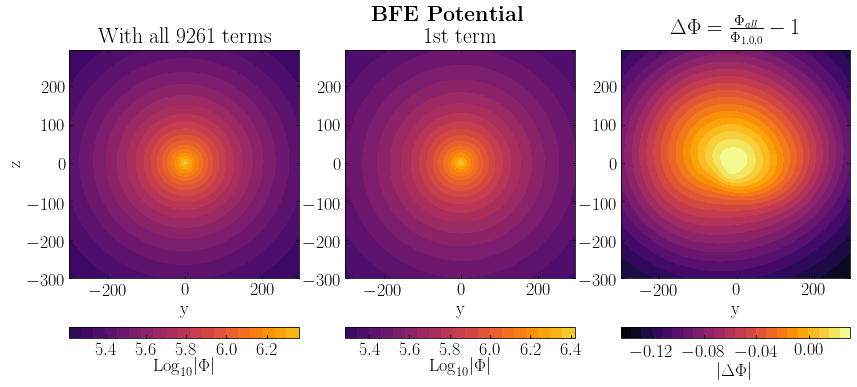

In [20]:
fig = figure(figsize=(14, 6))
fig.suptitle(r'$\textbf{BFE Potential}$') 



subplot(1, 3, 1)
title('With all 9261 terms')
contourf(y_grid, z_grid, np.log10(np.abs(pot_matrix)), 20, vmin=5, vmax=6.6, cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |\Phi|$')
cbar.set_ticks(np.arange(5, 6.6, 0.2))
xlabel('y')
ylabel('z')

subplot(1, 3, 2)
title('1st term')
contourf(y_grid, z_grid, np.log10(np.abs(pot_matrix_base)), 20, vmin=5, vmax=6.6, cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |\Phi|$')
cbar.set_ticks(np.arange(5, 6.6, 0.2))
xlabel('y')

subplot(1, 3, 3)
title(r'$\Delta \Phi = \frac{\Phi_{all}}{\Phi_{1,0,0}} - 1$')
contourf(y_grid, z_grid, (np.abs(pot_matrix/pot_matrix_base)-1), 20, cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$|\Delta \Phi|$')
cbar.set_ticks(np.arange(-0.16, 0.1, 0.04))
xlabel('y')
#savefig('BFE_potential.pdf', bbox_inches='tight')

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in log10


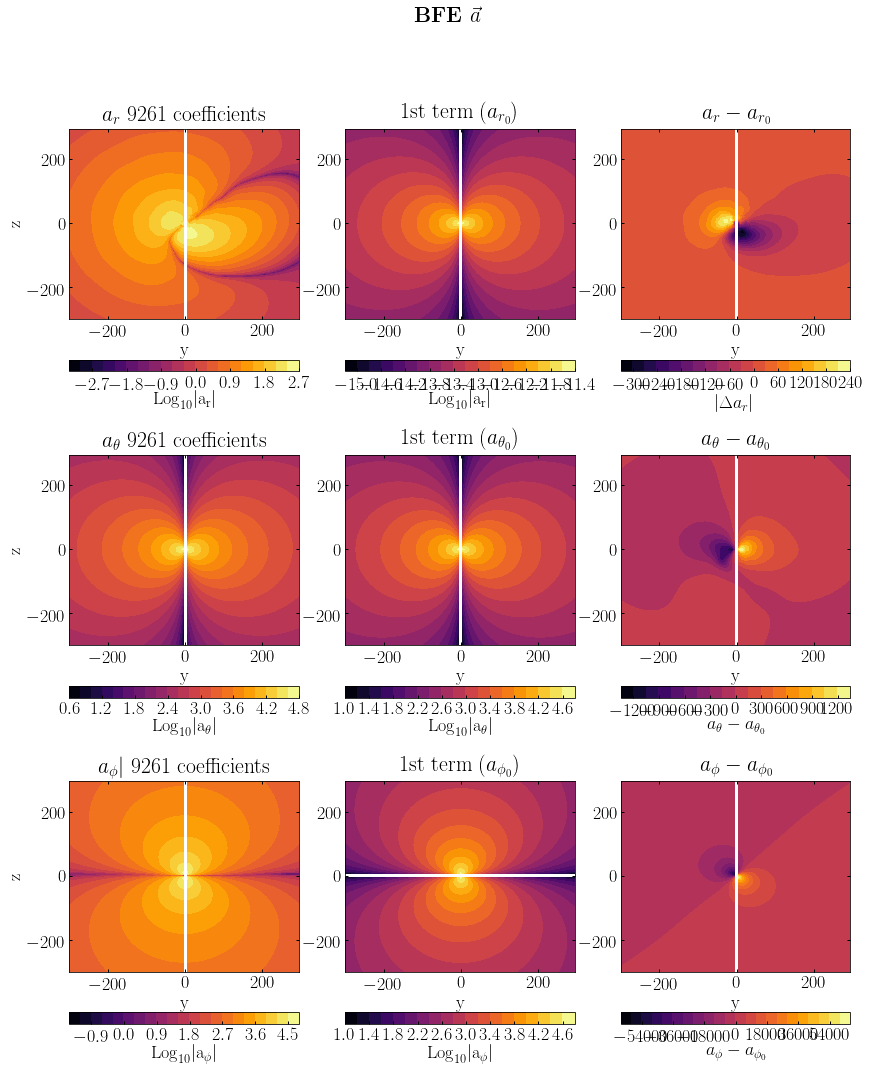

In [180]:
fig = figure(figsize=(14, 17))
fig.suptitle(r'$\textbf{BFE $\vec{a}$}$') 


subplot(3, 3, 1)
title('$a_r$ 9261 coefficients')
contourf(y_grid, z_grid, np.log10(np.abs(a_matrix_r)), 20,  cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |a_r|$')
#cbar.set_ticks(np.arange(5, 6.6, 0.2))
xlabel('y')
ylabel('z')

subplot(3, 3, 2)
title('1st term $(a_{r_0})$')
contourf(y_grid, z_grid, np.log10(np.abs(a_matrix_base_r)), 20,  cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |a_r|$')
#cbar.set_ticks(np.arange(5, 6.6, 0.2))
xlabel('y')

subplot(3, 3, 3)
title(r'$a_r - a_{r_0}$')
contourf(y_grid, z_grid, ((a_matrix_r-a_matrix_base_r)), 20, cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$|\Delta a_r|$')
#cbar.set_ticks(np.arange(-0.16, 0.1, 0.04))
xlabel('y')
#savefig('BFE_potential.pdf', bbox_inches='tight')

subplot(3, 3, 4)
title(r'$a_{\theta}$ 9261 coefficients')
contourf(y_grid, z_grid, np.log10(np.abs(a_matrix_theta)), 20,  cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |a_{\theta}|$')
#cbar.set_ticks(np.arange(5, 6.6, 0.2))
xlabel('y')
ylabel('z')

subplot(3, 3, 5)
title(r'1st term $(a_{\theta_0})$')
contourf(y_grid, z_grid, np.log10(np.abs(a_matrix_base_theta)), 20,  cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |a_{\theta}|$')
#cbar.set_ticks(np.arange(5, 6.6, 0.2))
xlabel('y')

subplot(3, 3, 6)
title(r'$a_{\theta} - a_{\theta_0}$')
contourf(y_grid, z_grid, ((a_matrix_theta-a_matrix_base_theta)), 20, cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$a_{\theta} - a_{\theta_0}$')
#cbar.set_ticks(np.arange(-0.16, 0.1, 0.04))
xlabel('y')


subplot(3, 3, 7)
title('$a_{\phi}|$ 9261 coefficients')
contourf(y_grid, z_grid, np.log10(np.abs(a_matrix_phi)), 20,  cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |a_{\phi}|$')
#cbar.set_ticks(np.arange(5, 6.6, 0.2))
xlabel('y')
ylabel('z')

subplot(3, 3, 8)
title('1st term $(a_{\phi_0})$')
contourf(y_grid, z_grid, np.log10(np.abs(a_matrix_base_phi)), 20,  cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |a_{\phi}|$')
#cbar.set_ticks(np.arange(5, 6.6, 0.2))
xlabel('y')

subplot(3, 3, 9)
title(r'$a_{\phi} - a_{\phi_0}$')
contourf(y_grid, z_grid, ((a_matrix_theta-a_matrix_base_phi)), 20, cmap='inferno', origin='lower')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$a_{\phi} - a_{\phi_0}$')
#cbar.set_ticks(np.arange(-0.16, 0.1, 0.04))
xlabel('y')


savefig('accelerations_BFE_MWLMC.pdf', bbox_inches='tight')

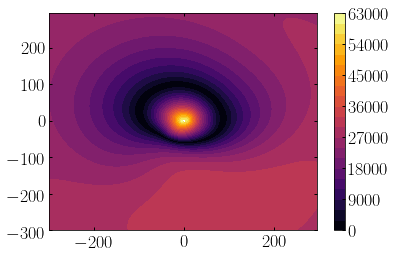

In [39]:
contourf(y_grid, z_grid, (np.abs(pot_matrix_per)), 20, cmap='inferno', origin='lower')
colorbar()

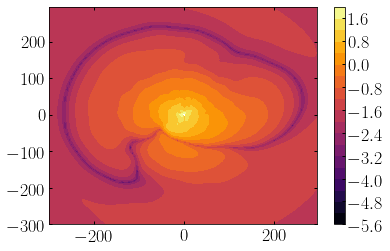

In [41]:
contourf(y_grid, z_grid, np.log10(np.abs(rho_matrix_per)), 20, cmap='inferno', origin='lower')
colorbar()

Text(0.5,0,'y')

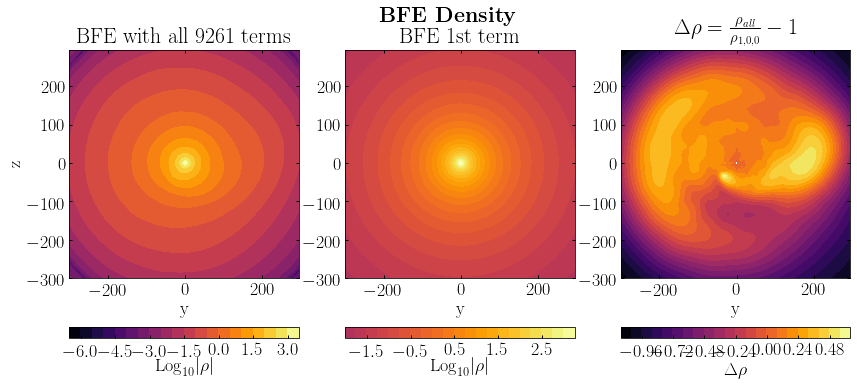

In [21]:
fig = figure(figsize=(14, 6))

fig.suptitle(r'$\textbf{BFE Density}$') 

subplot(1, 3, 1)
title('BFE with all 9261 terms')
contourf(y_grid_2, z_grid_2, np.log10(np.abs(rho_matrix)), 20, origin='lower', cmap='inferno')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |\rho|$')
#cbar.set_ticks(np.arange(-12, -2.9, 1.5))
xlabel('y')
ylabel('z')

subplot(1, 3, 2)
title('BFE 1st term')
contourf(y_grid_2, z_grid_2, np.log10(np.abs(rho_matrix_base)), 20, vmin=-6.5,  origin='lower',  cmap='inferno')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |\rho|$')
cbar.set_ticks(np.arange(-2.5, 3.6, 1))
xlabel('y')

subplot(1, 3, 3)
title(r'$\Delta \rho = \frac{\rho_{all}}{\rho_{1,0,0}} - 1$')
contourf(y_grid_2, z_grid_2, (rho_matrix/rho_matrix_base)-1, 20, origin='lower', cmap='inferno')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$ \Delta \rho$')
#cbar.set_ticks(np.arange(-12, -2.9, 1.5))
xlabel('y')

#savefig('BFE_density.pdf', bbox_inches='tight')

In [72]:
A_nl_matrix = np.zeros((21, 21, 21))
for i in range(21):
    A_nl_matrix[:,:,i] = A_nl_array

In [73]:
U_nlm = 0.5*(S_matrix**2 + T_matrix**2)/A_nl_matrix

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


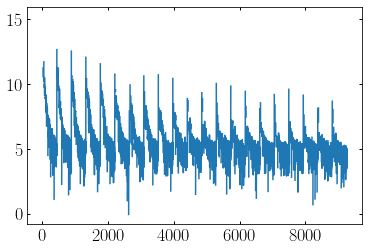

In [74]:
plot(np.log10(np.abs(U_nlm.flatten())))

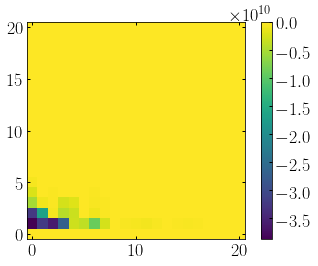

In [51]:
imshow(U_nlm[:,:,1].T, origin='lower')
colorbar()

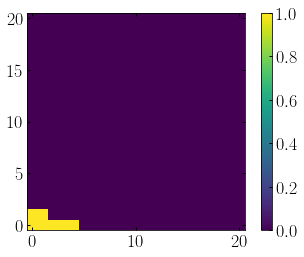

In [127]:
imshow(np.log10(np.abs(U_nlm[:,:,0].T))>11, origin='lower', vmin=0, vmax=1)
colorbar()

In [123]:

def copy_matrix(M, indices):
    M_new = np.zeros(shape(M))
    for i in range(len(indices[0])):
        M_new[indices[0][i]][indices[1][i]][indices[2][i]] = M[indices[0][i]][indices[1][i]][indices[2][i]]
    return M_new

def coefficients_energy_level(S, T, e_cut, verb=0):
    """
    Returns coefficients with energy higher than e_cut
    e_cut : float 
        between 0 and 1
        
    """
    n_max = shape(S)[0]
    l_max = shape(S)[1]
    m_max = shape(S)[2]
    
    
    A_nl_array = np.zeros((n_max, l_max))
    for j in range(n_max):
        for i in range(l_max):
            A_nl_array[j][i] = Anl(j, i)
    A_nl_matrix = np.zeros((n_max, l_max, m_max))
    for i in range(m_max):
        A_nl_matrix[:,:,i] = A_nl_array
    
    U_nlm = 0.5*(S**2 + T**2)/A_nl_matrix
    U_all = np.sum(U_nlm)
    energy_cut = np.where(np.log10(np.abs(U_nlm))>np.log10(np.abs(U_all))*e_cut)
    if verb == 1:
        print('\sum U = ',np.log10(np.abs(U_all)))
        print('U cut = ',np.log10(np.abs(U_all))*e_cut)
        print('N coeff = ', len(energy_cut[0]))

    S_new = copy_matrix(S, energy_cut)
    T_new = copy_matrix(T, energy_cut)
    return S_new, T_new, [np.max(energy_cut[0]) ,np.max(energy_cut[1]), np.max(energy_cut[2]), len(energy_cut[0])]
    
    

In [136]:
j = 0
e_cuts = np.linspace(0.2, 0.6, 10)
coeff_order = np.zeros((len(e_cuts),4))

for i in e_cuts:
    S_mwlmc_opt, T_mwlmc_opt, coeff_order[j] = coefficients_energy_level(S_matrix, T_matrix, i)



    rho_opt = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid_2.flatten())), y_grid_2.flatten(), z_grid_2.flatten()]).T), 
                               S_mwlmc_opt, 
                               T_mwlmc_opt,
                               M=1, r_s=r_s_sims)

    rho_matrix_opt = reshape(rho_opt, (N_grid, N_grid))

    figure(figsize=(7,6))
    title(r'$\Delta \rho$, U={}\%, ({},{},{}), Ncoeff={}'.format(int(i*100), coeff_order[j][0], 
                                                 coeff_order[j][1], coeff_order[j][2], coeff_order[j][3]))
    contourf(y_grid_2, z_grid_2, (rho_matrix_opt/rho_matrix_base)-1, 20, 
             origin='lower',  cmap='inferno', vmin=-1.2, vmax=0.5)
    xlabel('y')
    ylabel('z')
    cbar = colorbar()
    cbar.set_ticks(np.arange(-1.2, 0.6, 0.25))

    savefig('BFE_density_N_coeff_{}_zero.png'.format(int(i*100)), bbox_inches='tight')
    close()


/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/xzk/.local

In [147]:
delta_rho_all = (rho_matrix/rho_matrix_base)-1
j = 0
rho_mean = np.zeros(8)
rho_disp = np.zeros(8)
#rho_measures = [4, 5, 6, 7, 8, 9, 10, 11]
for i in e_cuts[5:]:
    S_mwlmc_opt, T_mwlmc_opt, coeff_order[j] = coefficients_energy_level(S_matrix, T_matrix, i)



    rho_opt = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid_2.flatten())), y_grid_2.flatten(), z_grid_2.flatten()]).T), 
                               S_mwlmc_opt, 
                               T_mwlmc_opt,
                               M=1, r_s=r_s_sims)

    rho_matrix_opt = reshape(rho_opt, (N_grid, N_grid))


    delta_rho_opt = (rho_matrix_opt/rho_matrix_base)-1

    figure(figsize=(6,6))
    title(r'$\% \Delta \rho$ U={}, ({} {} {}) Ncoeff={}'.format(int(i*100), coeff_order[j][0], 
                                                 coeff_order[j][1], coeff_order[j][2], coeff_order[j][3],
                                             ), fontsize=15)
    imshow(100*(delta_rho_opt-delta_rho_all)/delta_rho_all, origin='lower',
             cmap='inferno', vmin=-100, vmax=100, extent=[-300, 300, -300, 300])
    #rho_mean[j] = np.nanmean((delta_rho_opt-delta_rho_all)/delta_rho_all)
    #rho_disp[j] = np.nanstd((delta_rho_opt-delta_rho_all)/delta_rho_all)
    
    xlabel('y')
    ylabel('z')
    colorbar()
    j+=1
    savefig('BFE_density_N_coeff_{}_zero.png'.format(int(i*100)), bbox_inches='tight')
    close()

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


In [105]:
U_sum = np.max(np.log10(np.abs(U_nlm.flatten())))

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [106]:
U_sum

15.201317584982021

In [107]:
energy_bins = np.array([4, 5, 6, 7, 8, 9, 10, 11])/U_sum

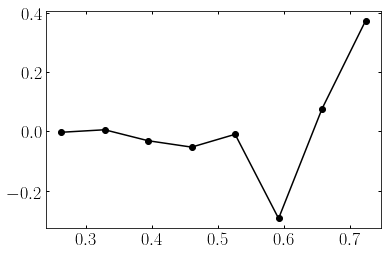

In [112]:
plot(energy_bins, rho_mean,  '-o', c='k')

## Plot the density/potential of the higher energy terms! 

In [153]:
index_discard = np.where(np.log10(np.abs(U_nlm))>10)


/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [52]:
index_discard

NameError: name 'index_discard' is not defined

In [145]:
S_matrix[0][0][0]

97663979.778841004

In [144]:
S_matrix[index_discard[0][0]][index_discard[1][0]][index_discard[2][0]]

97663979.778841004

In [159]:
index_discard = np.where(np.log10(np.abs(U_nlm))>10)

for i in range(len(index_discard[0])):
    S_mwlmc_coeff = np.zeros((21, 21, 21))
    S_mwlmc_coeff[index_discard[0][i]][index_discard[1][i]][index_discard[2][i]] = S_matrix[index_discard[0][i]][index_discard[1][i]][index_discard[2][i]]

    T_mwlmc_coeff = np.zeros((21, 21, 21))
    T_mwlmc_coeff[index_discard[0][i]][index_discard[1][i]][index_discard[2][i]] = T_matrix[index_discard[0][i]][index_discard[1][i]][index_discard[2][i]]




    rho_coeff = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid_2.flatten())), y_grid_2.flatten(), z_grid_2.flatten()]).T), 
                               S_mwlmc_coeff, 
                               T_mwlmc_coeff,
                               M=1, r_s=r_s_sims)

    rho_matrix_coeff = reshape(rho_coeff, (N_grid, N_grid))

    figure(figsize=(6,6))
    title('BFE density n={} l={} m={}'.format(index_discard[0][i], index_discard[1][i], index_discard[2][i]))
    contourf(y_grid_2, z_grid_2, (rho_matrix_coeff/rho_matrix_base)-1, 20, origin='lower',  cmap='inferno')
    xlabel('y')
    ylabel('z')
    savefig('BFE_density_coeff_{}_{}_{}_zero.png'.format(index_discard[0][i], index_discard[1][i], 
                                                         index_discard[2][i]), bbox_inches='tight')
    close()

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launc